# Target : Predict "SeriousDlqin2yrs" as probability form 
# Model  : Random forest 

In [1]:
import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
from sklearn.datasets import load_boston
import pylab as pl
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
cd /Users/GGV/Desktop/kaggle/give_me_some_credit/

/Users/GGV/Desktop/kaggle/give_me_some_credit


In [3]:
cs_training=pd.read_csv('cs-training.csv')
cs_test=pd.read_csv('cs-test.csv')
sampleEntry=pd.read_csv('sampleEntry.csv')
Data_Dictionary=pd.read_excel('Data_Dictionary.xls')

In [4]:
cs_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [5]:
# replace null in MonthlyIncome as MonthlyIncome's average
# replace null in NumberOfDependents as 0

cs_training['MonthlyIncome'] = cs_training['MonthlyIncome'].fillna(cs_training['MonthlyIncome'].mean())
cs_training['NumberOfDependents'] = cs_training['NumberOfDependents'].fillna(0)

In [6]:
cs_training.index= cs_training['Unnamed: 0']
cs_training = cs_training.drop('Unnamed: 0', 1)
cs_training.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
cs_training.groupby('SeriousDlqin2yrs').count()['RevolvingUtilizationOfUnsecuredLines']

SeriousDlqin2yrs
0    139974
1     10026
Name: RevolvingUtilizationOfUnsecuredLines, dtype: int64

In [8]:
cs_training.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [52]:
cs_training[cs_training['SeriousDlqin2yrs']==1].mean()

SeriousDlqin2yrs                           1.000000
RevolvingUtilizationOfUnsecuredLines       4.367282
age                                       45.926591
NumberOfTime30-59DaysPastDueNotWorse       2.388490
DebtRatio                                295.121066
MonthlyIncome                           5803.851610
NumberOfOpenCreditLinesAndLoans            7.882306
NumberOfTimes90DaysLate                    2.091362
NumberRealEstateLoansOrLines               0.988530
NumberOfTime60-89DaysPastDueNotWorse       1.828047
NumberOfDependents                         0.931279
dtype: float64

In [53]:
cs_training[cs_training['SeriousDlqin2yrs']==0].mean()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       6.168855
age                                       52.751375
NumberOfTime30-59DaysPastDueNotWorse       0.280109
DebtRatio                                357.151168
MonthlyIncome                           6732.277204
NumberOfOpenCreditLinesAndLoans            8.493620
NumberOfTimes90DaysLate                    0.135225
NumberRealEstateLoansOrLines               1.020368
NumberOfTime60-89DaysPastDueNotWorse       0.126666
NumberOfDependents                         0.723527
dtype: float64

# ML

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
X = cs_training[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]
Y= np.array(cs_training['SeriousDlqin2yrs'])

In [11]:
clf = RF(n_estimators=10)

X_train, X_test, y_train, y_test = train_test_split(X, Y)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.93333333333333335

In [12]:
confusion_matrix(clf.predict(X_test), y_test, labels=[1,0])

array([[  405,   446],
       [ 2054, 34595]])

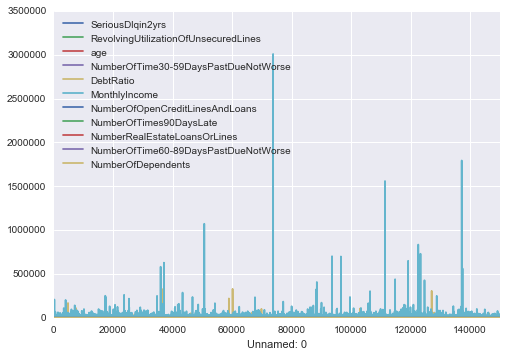

In [13]:
cs_training.plot()

In [45]:
cs_training.sort(columns='MonthlyIncome', ascending=False).head()

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,,,,,,,,,,,
73764,0,0.007328,52,0,0.001470,3008750.0,10,0,1,0,3.0
137141,0,0.000000,68,0,0.002776,1794060.0,15,0,1,0,0.0
111366,0,0.163856,44,0,0.004013,1560100.0,12,0,4,0,2.0
50641,0,0.469025,44,1,0.004537,1072500.0,9,0,2,0,1.0
122544,0,0.041599,55,0,0.000147,835040.0,8,0,0,0,0.0


/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


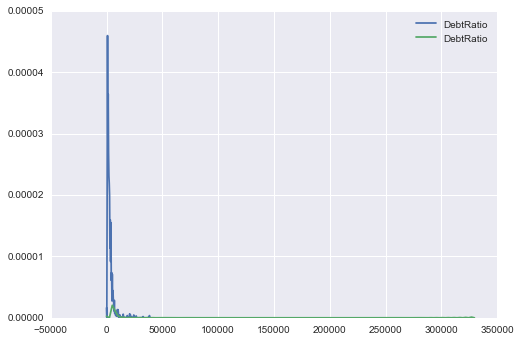

In [103]:
#print cs_training[cs_training['DebtRatio']<329664]['DebtRatio'].describe())
sns.kdeplot(cs_training[cs_training['SeriousDlqin2yrs']==1]['DebtRatio'])
sns.kdeplot(cs_training[cs_training['SeriousDlqin2yrs']==0]['DebtRatio'])
plt.legend();

In [ ]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

In [80]:
cs_training[cs_training['SeriousDlqin2yrs']==1].groupby(['SeriousDlqin2yrs','DebtRatio']).count().sort(columns='age',ascending=False)

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


RevolvingUtilizationOfUnsecuredLines  age  \
SeriousDlqin2yrs DebtRatio                                                 
1                0.000000                                       340  340   
                 36.000000                                        9    9   
                 22.000000                                        7    7   
                 13.000000                                        7    7   
                 54.000000                                        7    7   
                 3.000000                                         6    6   
                 21.000000                                        6    6   
                 50.000000                                        6    6   
                 10.000000                                        6    6   
                 14.000000                                        5    5   
                 18.000000                                        5    5   
                 24.000000                                        5    5   
                 396.000000                                       5    5   
                 25.000000                                        5    5   
                 4.000000                                         5    5   
                 548.000000                                       5    5   
                 706.000000                                       4    4   
                 31.000000                                        4    4   
                 9.000000                                         4    4   
                 19.000000                                        4    4   
                 8.000000                                         4    4   
                 1374.000000                                      4    4   
                 200.000000                                       4    4   
                 23.000000                                        4    4   
                 190.000000                                       4    4   
                 53.000000                                        4    4   
                 685.000000                                       4    4   
                 37.000000                                        4    4   
                 40.000000                                        4    4   
                 98.000000                                        4    4   
...                                                             ...  ...   
                 0.279620                                         1    1   
                 0.279702                                         1    1   
                 0.279873                                         1    1   
                 0.279970                                         1    1   
                 0.279289                                         1    1   
                 0.279981                                         1    1   
                 0.280225                                         1    1   
                 0.280229                                         1    1   
                 0.280242                                         1    1   
                 0.280267                                         1    1   
                 0.280533                                         1    1   
                 0.279297                                         1    1   
                 0.279268                                         1    1   
                 0.278096                                         1    1   
                 0.278308                                         1    1   
                 0.278148                                         1    1   
                 0.278200                                         1    1   
                 0.278258                                         1    1   
                 0.278266                                         1    1   
                 0.278293                                         1    1   
   

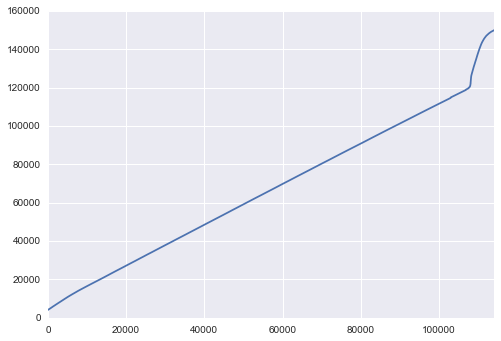

In [116]:
cs_training.groupby(['DebtRatio']).count().reset_index()['SeriousDlqin2yrs'].cumsum().plot()

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


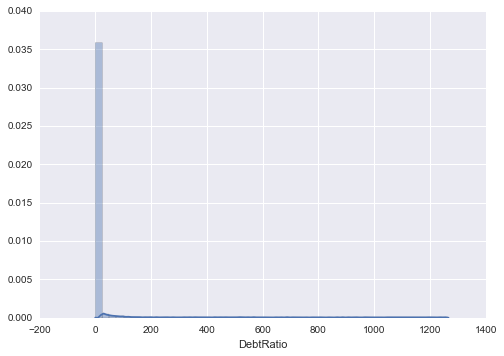

In [137]:
# To filter out rows of df where df.a is greater than or equal to the 95th percentile do

sns.distplot(cs_training[cs_training['DebtRatio'] < cs_training['DebtRatio'].quantile(.9)].sort(columns='DebtRatio',ascending=False)['DebtRatio'])

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


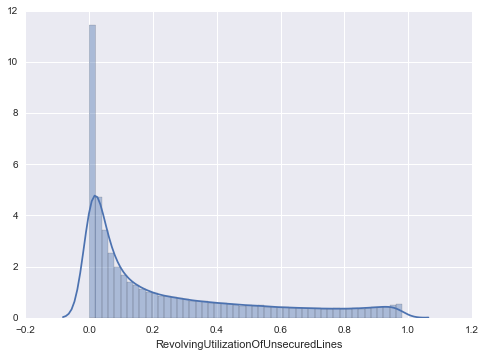

In [140]:
# To filter out rows of df where df.a is greater than or equal to the 95th percentile do

sns.distplot(cs_training[cs_training['RevolvingUtilizationOfUnsecuredLines'] < cs_training['RevolvingUtilizationOfUnsecuredLines'].quantile(.9)].sort(columns='RevolvingUtilizationOfUnsecuredLines',ascending=False)['RevolvingUtilizationOfUnsecuredLines'])

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


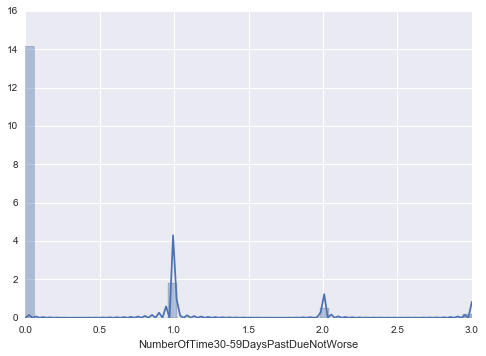

In [145]:
# To filter out rows of df where df.a is greater than or equal to the 95th percentile do

sns.distplot(cs_training[cs_training['NumberOfTime30-59DaysPastDueNotWorse'] < cs_training['NumberOfTime30-59DaysPastDueNotWorse'].quantile(.99)].sort(columns='NumberOfTime30-59DaysPastDueNotWorse',ascending=False)['NumberOfTime30-59DaysPastDueNotWorse'])

In [138]:
cs_training.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000
